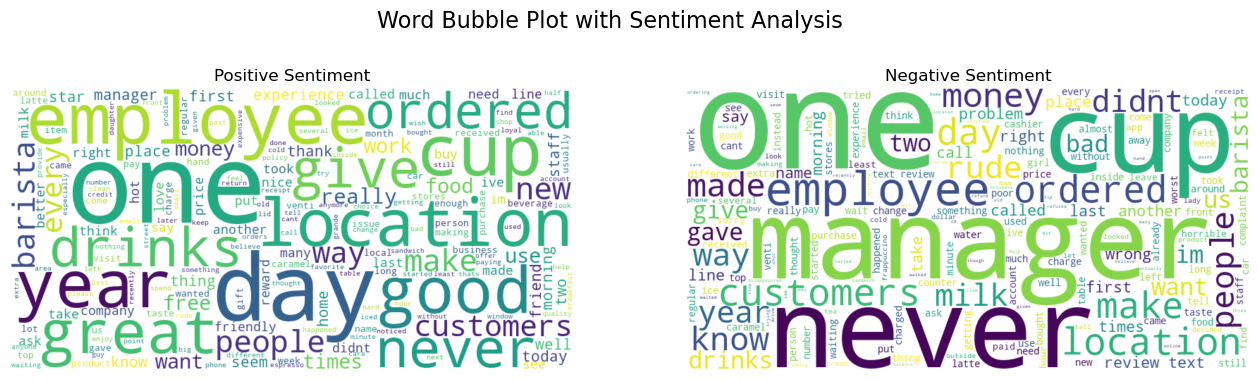

In [68]:
# Importing pandas
import pandas as pd


# Reading the dataset
data = pd.read_csv('reviews_data.csv')


# Text preprocessing
import string
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Removing punctuation and converting to lowercase
data['Review'] = data['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())

# Tokenisation
data['Tokens'] = data['Review'].apply(word_tokenize)

# Removing stop words
custom_stopwords = ["could", "dont", "going", "even", "always", ",",'’', "'", "got", "could", "coffee", "customer", "get", "starbucks", "drink", "store", "service", "time", "order", "said", "go", "would", "card", "went", "asked", "back", "told"]
stop_words = set(stopwords.words('english') + custom_stopwords)
data['Filtered Tokens'] = data['Tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])


# Performing sentiment analysis
# nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialising the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Calculating sentiment scores for each review
data['Sentiment Scores'] = data['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Calculating word frequencies
from collections import Counter
word_frequencies = Counter(word for words in data['Filtered Tokens'] for word in words)
data['Sentiment Scores'] = data['Sentiment Scores'].astype(float)


# Creating the word bubble plot

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable

# Extracting words and their frequencies
words, frequencies = zip(*word_frequencies.most_common(20))

# Creating a color map based on sentiment scores
color_map = ScalarMappable(cmap='coolwarm')
color_map.set_array(data['Sentiment Scores'])

# Installing the wordcloud library 
# pip install wordcloud
from wordcloud import WordCloud

# Grouping the words by sentiment
positive_words = [word for words in data['Filtered Tokens'][data['Sentiment Scores'] > 0] for word in words]
negative_words = [word for words in data['Filtered Tokens'][data['Sentiment Scores'] < 0] for word in words]

# Generating word clouds for positive and negative sentiment
positive_word_cloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(positive_words))
negative_word_cloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(negative_words))

# Creating subplots for positive and negative word clouds
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(positive_word_cloud, interpolation='bilinear')
axes[0].set_title('Positive Sentiment')
axes[0].axis("off")
axes[1].imshow(negative_word_cloud, interpolation='bilinear')
axes[1].set_title('Negative Sentiment')
axes[1].axis("off")

# Reducing the space between suptitle and graphs
plt.subplots_adjust(top=1.3)

plt.suptitle('Word Bubble Plot with Sentiment Analysis', fontsize=16)


# Saving the plot as an image
plt.savefig('word_bubble_plot.png', bbox_inches='tight', dpi=300) 

plt.show()

 